In [1]:
import pandas as pd
import os 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import sklearn.cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import re
from wordcloud import WordCloud, STOPWORDS

In [2]:
os.chdir(r"C:\Users\dboyd\OneDrive\Documents\MSBA\Q4\NLP")

In [3]:
data = pd.read_csv('All-Seasons.csv')

In [4]:
print(data.head())
print(len(data))
print(data.Character.value_counts())
print(type(data.Character.nunique()))

  Season Episode Character                                               Line
0     10       1      Stan         You guys, you guys! Chef is going away. \n
1     10       1      Kyle                        Going away? For how long?\n
2     10       1      Stan                                         Forever.\n
3     10       1      Chef                                  I'm sorry boys.\n
4     10       1      Stan  Chef said he's been bored, so he joining a gro...
70896
Cartman           9774
Stan              7680
Kyle              7099
Butters           2602
Randy             2467
                  ... 
BBC Anchor           1
Boys 1/2             1
An Elderly Man       1
Dr Adams             1
Priest 4             1
Name: Character, Length: 3950, dtype: int64
<class 'int'>


In [5]:
values = data.Character.value_counts()
print(type(values))
print(values.index)
print(values.values)
namedata = values[values.values > 1000]
print(namedata)
names = namedata.index.tolist()
names.append('Kenny')
print(names)

<class 'pandas.core.series.Series'>
Index(['Cartman', 'Stan', 'Kyle', 'Butters', 'Randy', 'Mr. Garrison', 'Chef',
       'Kenny', 'Sharon', 'Mr. Mackey',
       ...
       'Anderson Cooper', 'Floating Man', 'Townsperson 3',
       'Cartman and the Gingers', 'Girl In Pink', 'BBC Anchor', 'Boys 1/2',
       'An Elderly Man', 'Dr Adams', 'Priest 4'],
      dtype='object', length=3950)
[9774 7680 7099 ...    1    1    1]
Cartman         9774
Stan            7680
Kyle            7099
Butters         2602
Randy           2467
Mr. Garrison    1002
Name: Character, dtype: int64
['Cartman', 'Stan', 'Kyle', 'Butters', 'Randy', 'Mr. Garrison', 'Kenny']


In [6]:
print(data.Character.value_counts())
print(data.head())

Cartman           9774
Stan              7680
Kyle              7099
Butters           2602
Randy             2467
                  ... 
BBC Anchor           1
Boys 1/2             1
An Elderly Man       1
Dr Adams             1
Priest 4             1
Name: Character, Length: 3950, dtype: int64
  Season Episode Character                                               Line
0     10       1      Stan         You guys, you guys! Chef is going away. \n
1     10       1      Kyle                        Going away? For how long?\n
2     10       1      Stan                                         Forever.\n
3     10       1      Chef                                  I'm sorry boys.\n
4     10       1      Stan  Chef said he's been bored, so he joining a gro...


In [7]:
FinalData = data[data.Character.isin(names)]
print(FinalData.reset_index(drop = True))
print(len(FinalData))
print(FinalData.head())

      Season Episode Character  \
0         10       1      Stan   
1         10       1      Kyle   
2         10       1      Stan   
3         10       1      Stan   
4         10       1   Cartman   
...      ...     ...       ...   
31500      9      14      Stan   
31501      9      14     Randy   
31502      9      14      Stan   
31503      9      14     Randy   
31504      9      14      Stan   

                                                    Line  
0             You guys, you guys! Chef is going away. \n  
1                            Going away? For how long?\n  
2                                             Forever.\n  
3      Chef said he's been bored, so he joining a gro...  
4      I'm gonna miss him.  I'm gonna miss Chef and I...  
...                                                  ...  
31500                       I think you're pushing it.\n  
31501                                How about twenty?\n  
31502                           That's not disciprine.\n  
3

In [8]:
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''

    text = text.lower()
    
    text = re.sub(r"\n", "",  text)
    text = re.sub(r"[-()]", "", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"\!", " ", text)
    text = re.sub(r"\?", " ", text)
    text = re.sub(r"\,", " ", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"ohh", "oh", text)
    text = re.sub(r"ohhh", "oh", text)
    text = re.sub(r"ohhhh", "oh", text)
    text = re.sub(r"ohhhhh", "oh", text)
    text = re.sub(r"ohhhhhh", "oh", text)
    text = re.sub(r"ahh", "ah", text)
    
    return text

In [13]:
clean = []
for i in FinalData.Line:
    clean.append(clean_text(i))
FinalData.drop('Line', inplace = True, axis = 1)
FinalData['Line'] = clean

C:\Users\dboyd\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
print(FinalData.head())

  Season Episode Character                                               Line
0     10       1      Stan           you guys  you guys  chef is going away  
1     10       1      Kyle                          going away  for how long 
2     10       1      Stan                                           forever 
4     10       1      Stan  chef said he is been bored  so he joining a gr...
9     10       1   Cartman  i am gonna miss him   i am gonna miss chef and...


In [15]:
print(FinalData.columns)

Index(['Season', 'Episode', 'Character', 'Line'], dtype='object')


In [16]:
line = FinalData.Line.iloc[3]
tb = TextBlob(line)
print(tb.sentiment)
print("Sentiment:",tb.sentiment[0],"Subjectivity:",tb.sentiment[1])
print(type(tb.sentiment))
print(tb.tags)

Sentiment(polarity=-0.08333333333333334, subjectivity=0.8333333333333333)
Sentiment: -0.08333333333333334 Subjectivity: 0.8333333333333333
<class 'textblob.en.sentiments.Sentiment'>
[('chef', 'NN'), ('said', 'VBD'), ('he', 'PRP'), ('is', 'VBZ'), ('been', 'VBN'), ('bored', 'VBN'), ('so', 'RB'), ('he', 'PRP'), ('joining', 'VBG'), ('a', 'DT'), ('group', 'NN'), ('called', 'VBD'), ('the', 'DT'), ('super', 'NN'), ('adventure', 'NN'), ('club', 'NN')]


In [17]:
polarity = []
subjectivity = []
tags = []
for x in FinalData.Line:
    tb = TextBlob(x)
    polarity.append(tb.sentiment[0])
    subjectivity.append(tb.sentiment[1])
    tags.append(tb.tags)

In [18]:
print(len(polarity))
print(len(FinalData))

31505
31505


In [19]:
FinalData['tb_polarity'] = polarity
FinalData['tb_subjectivity'] = subjectivity
FinalData['Tags'] = tags
print(FinalData.head())

  Season Episode Character                                               Line  \
0     10       1      Stan           you guys  you guys  chef is going away     
1     10       1      Kyle                          going away  for how long    
2     10       1      Stan                                           forever    
4     10       1      Stan  chef said he is been bored  so he joining a gr...   
9     10       1   Cartman  i am gonna miss him   i am gonna miss chef and...   

   tb_polarity  tb_subjectivity  \
0     0.000000         0.000000   
1    -0.050000         0.400000   
2     0.000000         0.000000   
4    -0.083333         0.833333   
9     0.000000         0.000000   

                                                Tags  
0  [(you, PRP), (guys, VBP), (you, PRP), (guys, V...  
1  [(going, VBG), (away, RB), (for, IN), (how, WR...  
2                                    [(forever, RB)]  
4  [(chef, NN), (said, VBD), (he, PRP), (is, VBZ)...  
9  [(i, NN), (am, VBP), (go

C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [20]:
print(FinalData.describe())

        tb_polarity  tb_subjectivity
count  31505.000000     31505.000000
mean       0.034739         0.258710
std        0.261184         0.329092
min       -1.000000         0.000000
25%        0.000000         0.000000
50%        0.000000         0.000000
75%        0.054167         0.517857
max        1.000000         1.000000


In [21]:
vader = SentimentIntensityAnalyzer()
line = FinalData.Line[0]
print(vader.polarity_scores(line))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [22]:
positive = []
negative = []
neutral = []
vader = SentimentIntensityAnalyzer()
for x in FinalData.Line:
    line = x
    result = vader.polarity_scores(line)
    positive.append(result['pos'])
    negative.append(result['neg'])
    neutral.append(result['neu'])

In [23]:
FinalData['Vader_Pos'] = positive
FinalData['Vader_Neg'] = negative
FinalData['Vader_Neu'] = neutral

C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [24]:
print(FinalData.head())
print(FinalData.describe())

  Season Episode Character                                               Line  \
0     10       1      Stan           you guys  you guys  chef is going away     
1     10       1      Kyle                          going away  for how long    
2     10       1      Stan                                           forever    
4     10       1      Stan  chef said he is been bored  so he joining a gr...   
9     10       1   Cartman  i am gonna miss him   i am gonna miss chef and...   

   tb_polarity  tb_subjectivity  \
0     0.000000         0.000000   
1    -0.050000         0.400000   
2     0.000000         0.000000   
4    -0.083333         0.833333   
9     0.000000         0.000000   

                                                Tags  Vader_Pos  Vader_Neg  \
0  [(you, PRP), (guys, VBP), (you, PRP), (guys, V...      0.000      0.000   
1  [(going, VBG), (away, RB), (for, IN), (how, WR...      0.000      0.000   
2                                    [(forever, RB)]      0.000     

In [25]:
words = []
for x in FinalData.Line:
    length = x.split(' ')
    count = len(length)
    words.append(count)

In [26]:
FinalData['Word_Count'] = words

C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
FinalData['Vader_Net'] = FinalData.Vader_Pos - FinalData.Vader_Neg

C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
print(FinalData.head())

  Season Episode Character                                               Line  \
0     10       1      Stan           you guys  you guys  chef is going away     
1     10       1      Kyle                          going away  for how long    
2     10       1      Stan                                           forever    
4     10       1      Stan  chef said he is been bored  so he joining a gr...   
9     10       1   Cartman  i am gonna miss him   i am gonna miss chef and...   

   tb_polarity  tb_subjectivity  \
0     0.000000         0.000000   
1    -0.050000         0.400000   
2     0.000000         0.000000   
4    -0.083333         0.833333   
9     0.000000         0.000000   

                                                Tags  Vader_Pos  Vader_Neg  \
0  [(you, PRP), (guys, VBP), (you, PRP), (guys, V...      0.000      0.000   
1  [(going, VBG), (away, RB), (for, IN), (how, WR...      0.000      0.000   
2                                    [(forever, RB)]      0.000     

In [31]:
print(FinalData.Tags)

0        [(you, PRP), (guys, VBP), (you, PRP), (guys, V...
1        [(going, VBG), (away, RB), (for, IN), (how, WR...
2                                          [(forever, RB)]
4        [(chef, NN), (said, VBD), (he, PRP), (is, VBZ)...
9        [(i, NN), (am, VBP), (gon, VBG), (na, TO), (mi...
                               ...                        
70891    [(i, NN), (think, VBP), (you, PRP), (are, VBP)...
70892              [(how, WRB), (about, IN), (twenty, NN)]
70893    [(that, DT), (is, VBZ), (not, RB), (disciprine...
70894    [(right, RB), (right, NN), (does, VBZ), (vodka...
70895                                          [(dad, NN)]
Name: Tags, Length: 31505, dtype: object


In [32]:
FinalData.reset_index(drop = True, inplace = True)

In [33]:
emotions = {}
for t in FinalData.Tags:
    for x in t:
        if x[1] not in emotions.keys():
            emotions[str(x[1])] = 1
        else:
            emotions[x[1]] += 1

In [34]:
print(emotions)

{'PRP': 34210, 'VBP': 24752, 'NN': 69856, 'VBZ': 13487, 'VBG': 7900, 'RB': 28242, 'IN': 26972, 'WRB': 2978, 'JJ': 24711, 'VBD': 9389, 'VBN': 5133, 'DT': 27120, 'TO': 9413, 'VB': 26443, 'CC': 7605, 'PRP$': 6902, 'CD': 2270, 'MD': 6855, 'UH': 1535, 'WP': 4254, 'NNS': 14920, 'JJR': 726, 'RP': 2833, 'WDT': 1688, 'POS': 1999, 'PDT': 527, 'RBR': 309, 'EX': 1044, 'JJS': 521, 'FW': 92, 'NNP': 96, 'RBS': 79, 'WP$': 13, 'NNPS': 3}


In [35]:
listofdics = []
for x in FinalData.Tags:
    t = {}
    for j in x:
        if j[1] not in t.keys():
            t[str(j[1])] = 1
        else:
            t[j[1]] += 1
    listofdics.append(t)

In [36]:
FinalData['Part_of_Speech'] = listofdics

C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
print(FinalData.head())

  Season Episode Character                                               Line  \
0     10       1      Stan           you guys  you guys  chef is going away     
1     10       1      Kyle                          going away  for how long    
2     10       1      Stan                                           forever    
3     10       1      Stan  chef said he is been bored  so he joining a gr...   
4     10       1   Cartman  i am gonna miss him   i am gonna miss chef and...   

   tb_polarity  tb_subjectivity  \
0     0.000000         0.000000   
1    -0.050000         0.400000   
2     0.000000         0.000000   
3    -0.083333         0.833333   
4     0.000000         0.000000   

                                                Tags  Vader_Pos  Vader_Neg  \
0  [(you, PRP), (guys, VBP), (you, PRP), (guys, V...      0.000      0.000   
1  [(going, VBG), (away, RB), (for, IN), (how, WR...      0.000      0.000   
2                                    [(forever, RB)]      0.000     

In [38]:
long = []
for x in FinalData.Part_of_Speech:
    long.append(len(x))
print(max(long))

27


In [39]:
FinalData['#_PoS'] = long

C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
print(FinalData.head())

  Season Episode Character                                               Line  \
0     10       1      Stan           you guys  you guys  chef is going away     
1     10       1      Kyle                          going away  for how long    
2     10       1      Stan                                           forever    
3     10       1      Stan  chef said he is been bored  so he joining a gr...   
4     10       1   Cartman  i am gonna miss him   i am gonna miss chef and...   

   tb_polarity  tb_subjectivity  \
0     0.000000         0.000000   
1    -0.050000         0.400000   
2     0.000000         0.000000   
3    -0.083333         0.833333   
4     0.000000         0.000000   

                                                Tags  Vader_Pos  Vader_Neg  \
0  [(you, PRP), (guys, VBP), (you, PRP), (guys, V...      0.000      0.000   
1  [(going, VBG), (away, RB), (for, IN), (how, WR...      0.000      0.000   
2                                    [(forever, RB)]      0.000     

In [41]:
# we can take this dataset to tableau to finsh it up
print(FinalData.head())
FinalData.to_csv('FinalData.csv', index = False)

  Season Episode Character                                               Line  \
0     10       1      Stan           you guys  you guys  chef is going away     
1     10       1      Kyle                          going away  for how long    
2     10       1      Stan                                           forever    
3     10       1      Stan  chef said he is been bored  so he joining a gr...   
4     10       1   Cartman  i am gonna miss him   i am gonna miss chef and...   

   tb_polarity  tb_subjectivity  \
0     0.000000         0.000000   
1    -0.050000         0.400000   
2     0.000000         0.000000   
3    -0.083333         0.833333   
4     0.000000         0.000000   

                                                Tags  Vader_Pos  Vader_Neg  \
0  [(you, PRP), (guys, VBP), (you, PRP), (guys, V...      0.000      0.000   
1  [(going, VBG), (away, RB), (for, IN), (how, WR...      0.000      0.000   
2                                    [(forever, RB)]      0.000     

In [ ]:
# wordcloud for the entire dataset
stopwords = STOPWORDS
comment_words = ''
for x in FinalData.Line:
    t = x.split()
    for i in range(len(t)):
        t[i] = t[i].lower()
    
    comment_words += " ".join(t)+" "
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = STOPWORDS, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [42]:
g = list(FinalData.Character.unique())
print(g.index('Kenny'))
print(len(g))
print(g)

4
7
['Stan', 'Kyle', 'Cartman', 'Randy', 'Kenny', 'Butters', 'Mr. Garrison']


In [ ]:
# wordcloud for each character
fig = plt.figure(figsize = (20,20), facecolor = None)
for t in list(FinalData.Character.unique()):
    stopwords = STOPWORDS
    comment_words = ''
    for x in FinalData.Line[FinalData.Character == t]:
        z = x.split()
        for i in range(len(z)):
            z[i] = z[i].lower()
    
        comment_words += " ".join(z)+" "
    wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = STOPWORDS, min_font_size = 10).generate(comment_words)
    wordcloud.to_file(t+"_wordcloud.png")
    fig.add_subplot(4,2,list(FinalData.Character.unique()).index(t) + 1)
    plt.title(t + " WordCloud")
    plt.imshow(wordcloud) 
    plt.axis('off')
  
    plt.show()

In [43]:
def get_tb_polarity(text):
    tb = TextBlob(text)
    polarity= tb.sentiment[0]
    return polarity
def get_tb_subjectivity(text):
    tb = TextBlob(text)
    subjectivity = tb.sentiment[1]
    return subjectivity
def get_vader_pos(text):
    result = vader.polarity_scores(text)
    return result['pos']
def get_vader_neg(text):
    result = vader.polarity_scores(text)
    return result['neg']
def get_vader_neu(text):
    result = vader.polarity_scores(text)
    return result['neu']
def get_review_length(text):
    x = text.split(' ')
    length = len(x)
    return length

In [69]:
class CustomFeats(BaseEstimator, TransformerMixin):
    def __init__(self):
      self.feat_names = set()

    def fit(self, x, y=None):
        return self

    @staticmethod
    def features(line):
      return {
          'tb_polarity': get_tb_polarity(line),
          'tb_subjectivity': get_tb_subjectivity(line),
          'Vader_Pos':get_vader_pos(line),
          'Vader_Neg':get_vader_neg(line),
          'Vader_Neu':get_vader_neu(line),
          'Review_Length': get_review_length(line)
      }

    def get_feature_names(self):
        return list(self.feat_names)
      
    def transform(self, lines):
      feats = []
      for line in lines:
        f = self.features(line)
        [self.feat_names.add(k) for k in f] 
        feats.append(f)
      return feats

features = FeatureUnion([
     ('custom', make_pipeline(CustomFeats(), DictVectorizer())),
     ('bag_of_words', TfidfVectorizer(ngram_range = (0,1), stop_words = 'english'))
 ])

In [45]:
# might not need this
# if we decide to cluster as a supervised learning model, but I think we should stay unsupervised 
print(FinalData.Character.unique())
names_to_clusters = {'Stan':1,'Kyle':2,'Cartman':3,'Randy':4,'Kenny':5,'Butters':6,'Mr. Garrsion':7}
DataForCluster = FinalData[['Character','Line']]
DataForCluster.replace({'Character':names_to_clusters}, inplace = True)
train, test = train_test_split(DataForCluster,  test_size = .3, random_state = 42)
print(train, test)

['Stan' 'Kyle' 'Cartman' 'Randy' 'Kenny' 'Butters' 'Mr. Garrison']
      Character                                               Line
29655         2                                                ah 
21013         2                           hey  what are you doing 
1768          3  of course i was right  i told you only poor pe...
30887         3                               because i do  clyde 
2322          4  thanks for the news flash  i have not taken a ...
...         ...                                                ...
29802         1                                              woof 
5390          3           we were talking about wales the country 
860           3  all right  kenny  drink your elixir of the mon...
15795         4  i  uh  got a note from stanley to come out to ...
23654         6                   wwell  kkinda like cartman   aw 

[22053 rows x 2 columns]       Character                                               Line
31437         1     dad  you are dru

C:\Users\dboyd\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


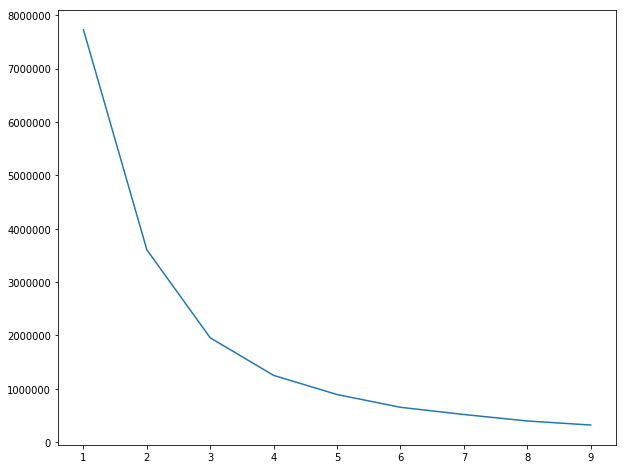

In [47]:
# let's build a clustering model to put together similar Lines by sentiment and other variables (unsupervised learning - no target, just want to see how they group)
plt.figure(figsize = (10,8))
inertia = []
vader = SentimentIntensityAnalyzer()
for x in range(1,10):
    kmeans = KMeans(n_clusters = x, init = 'k-means++', random_state = 42)
    pipeline = make_pipeline(features, kmeans)
    pipeline.fit(FinalData.Line)
    inertia.append(pipeline.named_steps['kmeans'].inertia_)
plt.plot(range(1,10), inertia)
plt.show()

In [89]:
# looks like we are doing well at 4 or 5 clusters, this will be mainly focused on the sentiment scores
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
pipeline = make_pipeline(features, kmeans)
pipeline.fit(FinalData.Line)
clusters = pipeline.predict(FinalData.Line)
print(clusters)

[1 1 1 ... 1 1 1]


In [90]:
clusters = clusters.tolist()
FinalData['Cluster'] = clusters
print(FinalData.Cluster.value_counts())

1    20649
0     8766
3     1833
2      257
Name: Cluster, dtype: int64


C:\Users\dboyd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
#FinalData.drop('Cluster', inplace = True, axis = 1)

C:\Users\dboyd\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
print(FinalData[FinalData.Cluster == 0].describe())
print(FinalData[FinalData.Cluster == 1].describe())
print(FinalData[FinalData.Cluster == 2].describe())
print(FinalData[FinalData.Cluster == 3].describe())

       tb_polarity  tb_subjectivity    Vader_Pos    Vader_Neg    Vader_Neu  \
count  8766.000000      8766.000000  8766.000000  8766.000000  8766.000000   
mean      0.048624         0.363020     0.113122     0.083217     0.803664   
std       0.294412         0.326623     0.123972     0.113760     0.149782   
min      -1.000000         0.000000     0.000000     0.000000     0.042000   
25%       0.000000         0.000000     0.000000     0.000000     0.701000   
50%       0.000000         0.383333     0.099000     0.000000     0.815000   
75%       0.200000         0.600000     0.184000     0.155000     0.913000   
max       1.000000         1.000000     0.958000     0.770000     1.000000   

        Word_Count    Vader_Net        #_PoS  Cluster  
count  8766.000000  8766.000000  8766.000000   8766.0  
mean     21.581223     0.029905    10.084417      0.0  
std       5.475347     0.184895     2.300364      0.0  
min      15.000000    -0.770000     1.000000      0.0  
25%      17.00000

In [94]:
FinalData.drop(['Tags','Part_of_Speech','#_PoS'], inplace = True, axis = 1)
print(FinalData.head(5))

  Season Episode Character                                               Line  \
0     10       1      Stan           you guys  you guys  chef is going away     
1     10       1      Kyle                          going away  for how long    
2     10       1      Stan                                           forever    
3     10       1      Stan  chef said he is been bored  so he joining a gr...   
4     10       1   Cartman  i am gonna miss him   i am gonna miss chef and...   

   tb_polarity  tb_subjectivity  Vader_Pos  Vader_Neg  Vader_Neu  Word_Count  \
0     0.000000         0.000000      0.000      0.000      1.000          12   
1    -0.050000         0.400000      0.000      0.000      1.000           7   
2     0.000000         0.000000      0.000      0.000      1.000           2   
3    -0.083333         0.833333      0.291      0.099      0.610          19   
4     0.000000         0.000000      0.000      0.144      0.856          27   

   Vader_Net  Cluster  
0      0

C:\Users\dboyd\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [95]:
FinalData.to_csv('ClusteringNLP.csv')